# Load Data

## 곰취(시설)

In [2]:
import os
import pandas as pd
import numpy as np


def load_data(path):
    use_cols = ['age1',
                'cvl00', 'cvl10',
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara',# catecorical variable
                'ydh_ty1'] # dependent variable

    dataframe_list = []

    # 2018
    print('-'*10)
    ## 시설
    file_path1 = os.path.join(path, '2018년/2018년 임산물생산비조사_통합 데이터_7. 곰취_시설(엑셀 1).xls')
    file_path2 = os.path.join(path, '2018년/2018년 임산물생산비조사_통합 데이터_7. 곰취_시설(엑셀 2).xls')

    forest_data1 = pd.read_excel(file_path1)
    forest_data2 = pd.read_excel(file_path2)
    forest_2018 = pd.concat([forest_data1, forest_data2], axis=1)

    dataframe_list.append(forest_2018.loc[:,use_cols])
    print(2018, forest_2018.shape, '시설')


    # 2019
    print('-'*10)
    file_path = os.path.join(path, '2019년/2019년 임산물생산비조사_통합 데이터_7. 곰취시설.xlsx')
    forest_2019 = pd.read_excel(file_path)
    dataframe_list.append(forest_2019.loc[:,use_cols])
    print(2019, forest_2019.shape, '시설')
    

    data = pd.concat(dataframe_list, axis=0)
    data = data.reset_index(drop=True)
    
    return data
    
data = load_data('./임산물생산비조사 마이크로데이터(2010-2019)')

----------
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
2018 (36, 401) 시설
----------
2019 (31, 417) 시설


In [3]:
data

,age1,cvl00,cvl10,labch,labh_hour,lab_cost,fmtc,lansh,size,ara,ydh_ty1
0,76,0.46,0.46,2.952070e+07,2280.434783,13579524,7.827571e+07,9.130435e+06,2,32,3108.695652
1,53,14.99,3.33,7.377251e+05,62.374917,11058499,6.443748e+06,2.001334e+05,2,32,223.482322
2,54,1.40,1.40,3.838492e+06,305.000000,5373889,1.332677e+07,6.428571e+05,1,32,478.571429
3,59,0.17,0.17,3.301241e+07,3152.941176,5612109,7.102955e+07,2.941176e+06,1,32,7352.941176
4,64,0.40,0.40,1.726748e+07,1440.000000,6906990,5.348520e+07,1.000000e+06,1,32,3075.000000
...,...,...,...,...,...,...,...,...,...,...,...
62,64,0.17,0.17,6.739198e+07,5388.235294,11456636,1.001775e+08,2.501471e+06,1,37,5923.529412
63,62,0.17,0.17,5.123978e+07,4211.764706,8710762,8.902368e+07,2.501471e+06,1,37,19105.882353
64,66,0.10,0.10,3.916637e+07,3160.000000,3916637,6.819470e+07,2.551500e+06,1,37,1790.000000
65,70,0.10,0.10,6.594004e+07,5170.000000,6594004,1.041264e+08,2.551500e+06,1,37,4290.000000


In [4]:
print(np.sum(data['ydh_ty1'] == 0))
data.drop(data[data['ydh_ty1'] == 0].index, inplace=True)
print(data.shape)

2
(65, 11)


In [9]:
data.isnull().sum()

age1         0
cvl00        0
cvl10        0
labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
ydh_ty1      0
dtype: int64

In [10]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

age1         0
cvl00        0
cvl10        0
labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
ydh_ty1      0
dtype: int64

In [11]:
for column in data.columns:
    if len(data[column].value_counts()) <= 10:
        print(data[column].value_counts())
        print()

1    52
2     9
3     3
4     1
Name: size, dtype: int64

32    51
37    12
36     2
Name: ara, dtype: int64



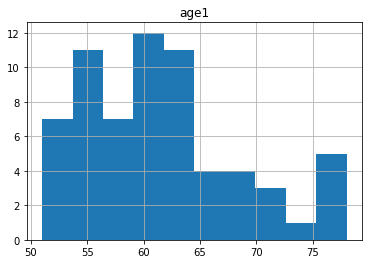

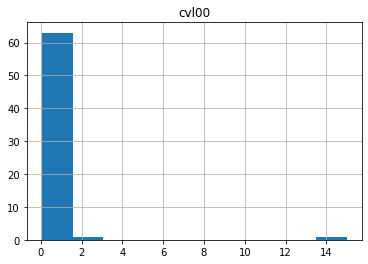

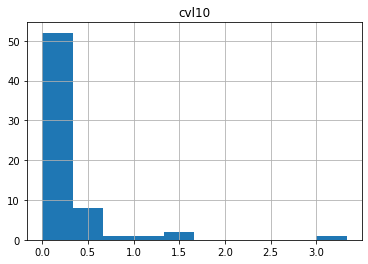

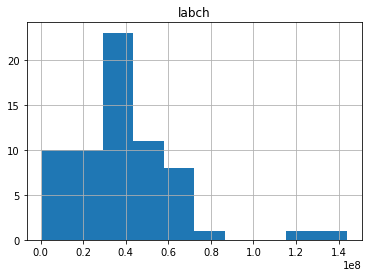

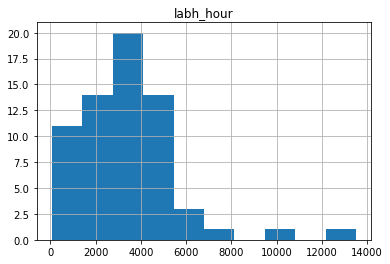

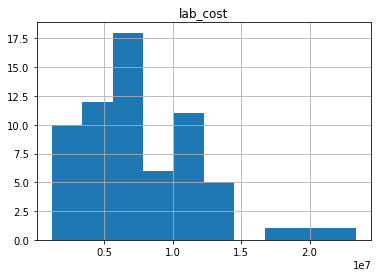

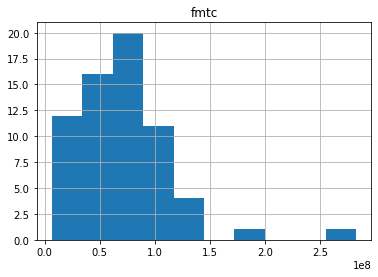

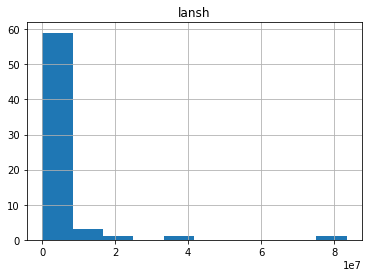

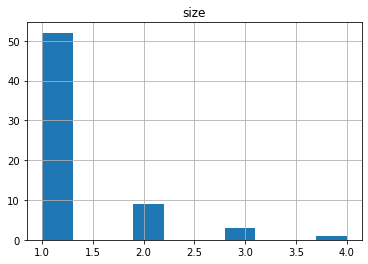

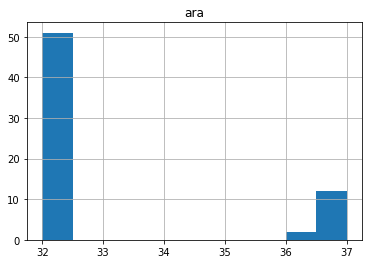

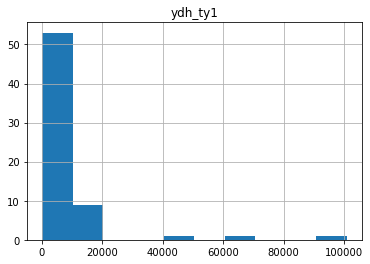

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Log Transform

In [13]:
data.loc[:, ['cvl00', 'cvl10']] = np.log1p(data.loc[:, ['cvl00','cvl10']])
data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])

In [14]:
data['ydh_ty1'] = np.log1p(data['ydh_ty1'])

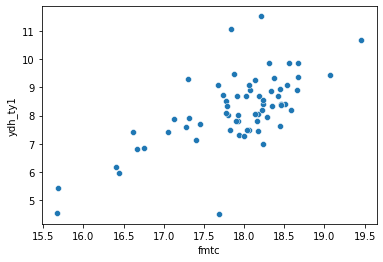

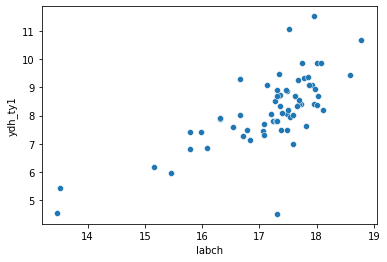

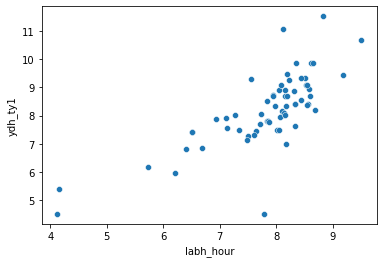

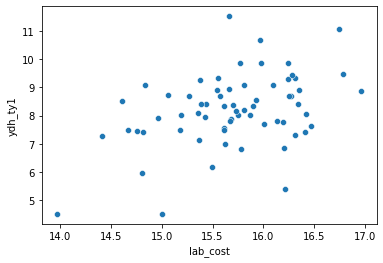

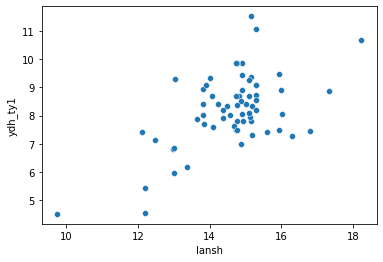

In [15]:
import seaborn as sns

sns.scatterplot(x='fmtc', y='ydh_ty1', data=data)
plt.show()

sns.scatterplot(x='labch', y='ydh_ty1', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='ydh_ty1', data=data)
plt.show()

sns.scatterplot(x='lab_cost', y='ydh_ty1', data=data)
plt.show()

sns.scatterplot(x='lansh', y='ydh_ty1', data=data)
plt.show()

## NaN Check

In [16]:
data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan}},
             inplace=True)

In [17]:
data.isnull().sum()

age1         0
cvl00        0
cvl10        0
labch        0
labh_hour    0
lab_cost     0
fmtc         0
lansh        0
size         0
ara          0
ydh_ty1      0
dtype: int64

In [18]:
data.dropna(axis=0, inplace=True)

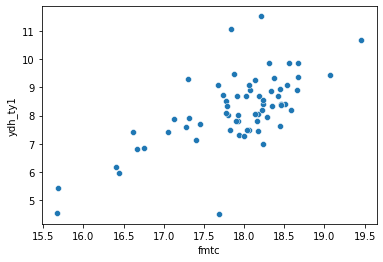

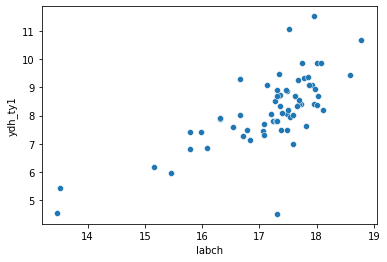

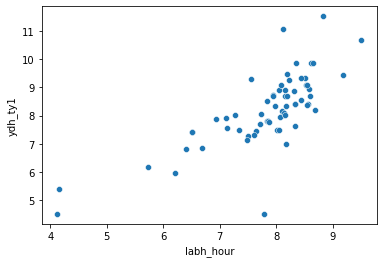

In [19]:
sns.scatterplot(x='fmtc', y='ydh_ty1', data=data)
plt.show()

sns.scatterplot(x='labch', y='ydh_ty1', data=data)
plt.show()

sns.scatterplot(x='labh_hour', y='ydh_ty1', data=data)
plt.show()

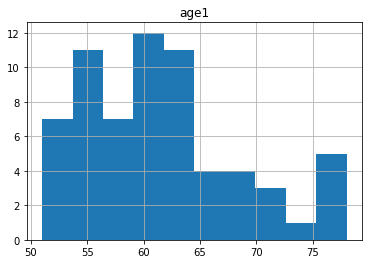

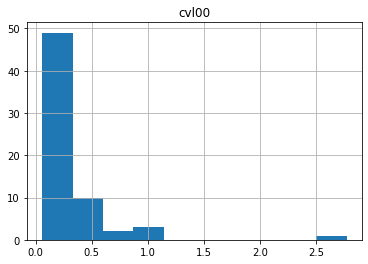

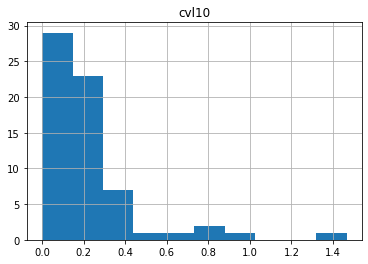

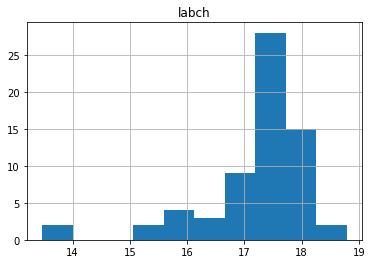

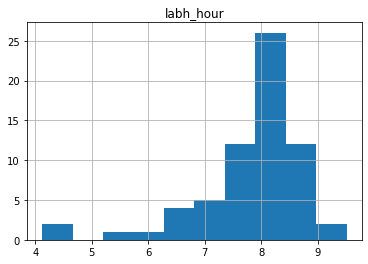

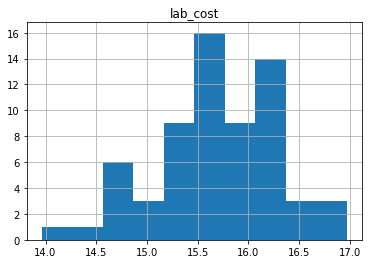

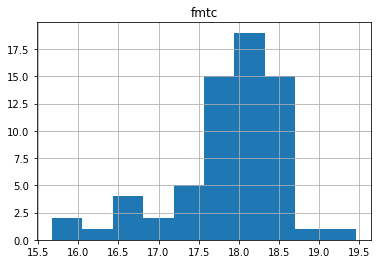

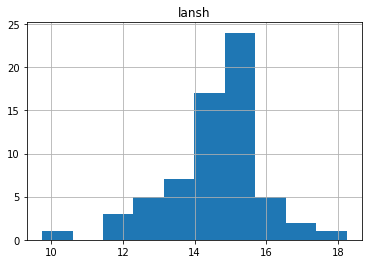

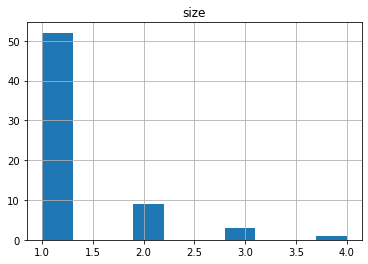

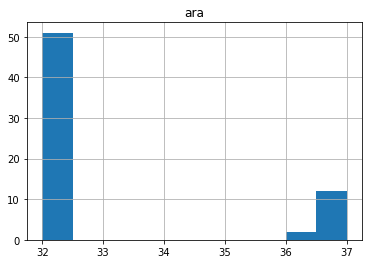

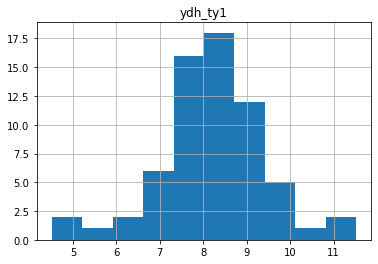

In [20]:
for column in data.columns:
    data[column].hist()
    plt.title(column)
    plt.show()

## Categorical Variable processing

In [21]:
from sklearn.preprocessing import OneHotEncoder

categorical_variables = ['size', 'ara']
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, categorical_variables])
onehot = onehot_encoder.fit_transform(data.loc[:, categorical_variables])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array([1, 2, 3, 4]), array([32, 36, 37])]
(65, 7)


## Numerical Variable processing

In [22]:
from sklearn.preprocessing import MinMaxScaler

numerical_variables = ['age1',
                       'cvl00', 'cvl10',
                       'labch', 'labh_hour', 'lab_cost',
                       'fmtc', 'lansh']
X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, numerical_variables])
X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
X_scaled

array([[0.92592593, 0.11798215, 0.25821835, 0.70229992, 0.66996932,
        0.81857205, 0.66096312, 0.73975498],
       [0.07407407, 1.        , 1.        , 0.00850387, 0.00525096,
        0.75015853, 0.0018834 , 0.29012633],
       [0.11111111, 0.3011392 , 0.59735816, 0.3186602 , 0.29731536,
        0.50975377, 0.19367566, 0.42746539],
       [0.2962963 , 0.03638392, 0.10712829, 0.72332317, 0.73004143,
        0.52420333, 0.6353241 , 0.60643292],
       [0.48148148, 0.10251829, 0.22958494, 0.60145081, 0.58474063,
        0.59336425, 0.56044805, 0.47946557],
       [0.07407407, 0.10251829, 0.19458601, 0.57658404, 0.55888311,
        0.54931418, 0.42436657, 0.51147001],
       [0.59259259, 0.0202896 , 0.07732751, 0.83882949, 0.81739703,
        0.61278364, 0.75566793, 0.65316809],
       [0.11111111, 0.13523955, 0.29017273, 0.5357648 , 0.52062179,
        0.57075307, 0.38267109, 0.46020769],
       [0.        , 0.0636928 , 0.        , 0.5341437 , 0.55621746,
        0.33062544, 0.432175

In [23]:
numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,age1,cvl00,cvl10,labch,labh_hour,lab_cost,fmtc,lansh,0,1,2,3,4,5,6
0,0.925926,0.117982,0.258218,0.702300,0.669969,0.818572,0.660963,0.739755,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.074074,1.000000,1.000000,0.008504,0.005251,0.750159,0.001883,0.290126,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.111111,0.301139,0.597358,0.318660,0.297315,0.509754,0.193676,0.427465,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.296296,0.036384,0.107128,0.723323,0.730041,0.524203,0.635324,0.606433,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.481481,0.102518,0.229585,0.601451,0.584741,0.593364,0.560448,0.479466,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.481481,0.036384,0.107128,0.857529,0.829420,0.761941,0.726078,0.587375,1.0,0.0,0.0,0.0,0.0,0.0,1.0
61,0.407407,0.036384,0.107128,0.805999,0.783736,0.670660,0.694922,0.587375,1.0,0.0,0.0,0.0,0.0,0.0,1.0
62,0.555556,0.013650,0.065033,0.755469,0.730456,0.404378,0.624574,0.589706,1.0,0.0,0.0,0.0,0.0,0.0,1.0
63,0.703704,0.013650,0.065033,0.853433,0.821752,0.577916,0.736282,0.589706,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X_data = np.array(X_data_df)
y_data = np.array(data['ydh_ty1'])

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    random_state=1234)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(58, 15) (58,)
(7, 15) (7,)


# Modeling

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [27]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[9.07254444 6.97768105 6.97768105 7.57609734 8.34124513 9.87101601
 7.28687641]


In [28]:
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_rmse

0.9644727122859932

## RandomForest

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 3000, max_features = 'sqrt', 
                           random_state = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=3000, random_state=1000)

In [30]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[8.95641885 8.26003915 7.99023826 7.52674542 8.90691861 9.73135449
 7.77451938]


In [31]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_rmse

0.6535653854067468

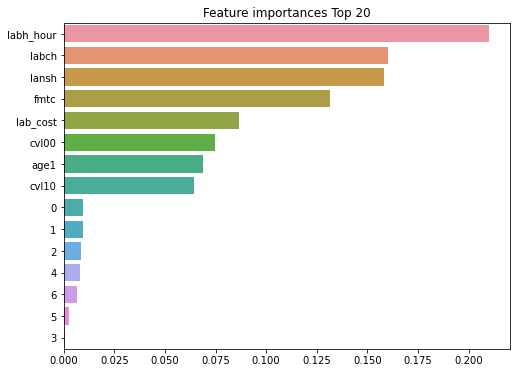

In [32]:
import seaborn as sns

importances_values = rf.feature_importances_ 
importances = pd.Series(importances_values, index=X_data_df.columns)

top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

## Ridge

In [33]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1724)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1724)

In [34]:
print(ridge.score(X_train, y_train))

0.6910908197380379


In [35]:
ridge_pred = ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_rmse

0.4794207129078986

## LASSO

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [37]:
print(lasso.score(X_train, y_train))

0.7434440440272082


In [38]:
lasso_pred = lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_rmse

0.44092228282784945

## GBM

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=8)
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[ 9.26177658  7.21989507  7.2020934   7.57263059  8.4344407  10.96572856
  7.36462523]


In [40]:
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_pred))
gbm_rmse

1.22729507249548

## AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators = 500, learning_rate = 0.1)
ada.fit(X_train, y_train)

ada_pred = ada.predict(X_test)
print(ada_pred[:10])

[9.08558169 8.26351636 8.03028206 7.65913087 8.68896284 9.59630396
 7.81220563]


In [42]:
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
ada_rmse

0.633177085589064

## XGBoost

In [43]:
import xgboost as xgb
print(xgb.__version__)

xgb_reg = xgb.XGBRegressor(learning_rate=0.08, max_depth=8, 
                           gamma=0, n_estimators=3000,
                           subsample=0.7, colsample_bytree=0.8)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

1.3.3
[8.902129  8.381539  7.6450157 7.484128  8.53564   9.888898  7.585874 ]


In [44]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_rmse

0.7556160385531607

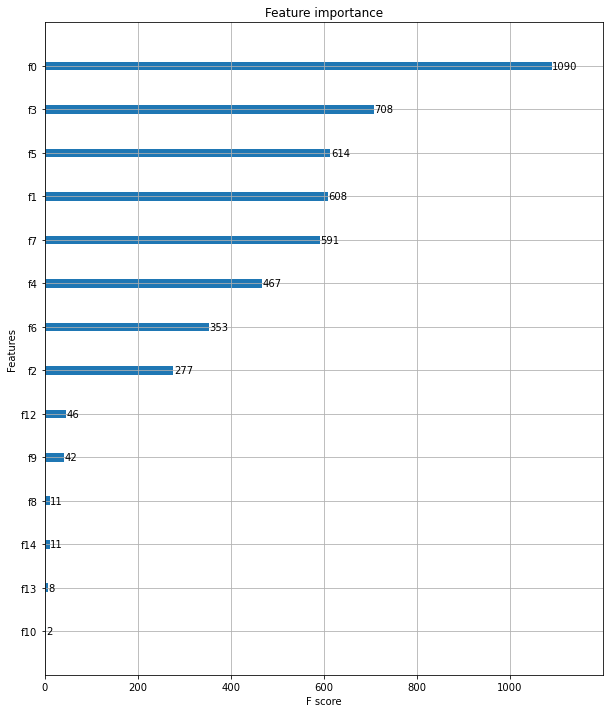

In [45]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [46]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=1000, max_depth=50, num_leaves=10, min_data_in_leaf=10)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

LGBMRegressor(max_depth=50, min_data_in_leaf=10, n_estimators=1000,
              num_leaves=10)

In [47]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[8.44808074 8.19327058 8.19327058 7.97196496 8.32146441 8.44808074
 7.97196496]


In [48]:
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
lgb_rmse

0.3636281600228354

# Model Comparison

In [49]:
model_result = pd.DataFrame({
    'Model': ['Decision Tree', 'RandomForest', 'Ridge', 'LASSO',
              'GBM', 'AdaBoost', 'XGboost', 'LightGBM'],
    'RMSE': [dt_rmse, rf_rmse, ridge_rmse, lasso_rmse,
             gbm_rmse, ada_rmse, xgb_rmse, lgb_rmse]})
model_result.sort_values(by='RMSE', ascending=True)

,Model,RMSE
7,LightGBM,0.363628
3,LASSO,0.440922
2,Ridge,0.479421
5,AdaBoost,0.633177
1,RandomForest,0.653565
6,XGboost,0.755616
0,Decision Tree,0.964473
4,GBM,1.227295


# Ensemble

In [50]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
    def predict(self, X_test):
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)
            
        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        pred_list = []
        for i, model in enumerate(models.values()):
            pred_list.append(model.predict(X_test))
        preds = np.array(pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights)
        result['RMSE'] = np.sqrt(mse)

        return result.sort_values('RMSE', ascending=True)

In [51]:
models = {'LASSO' : lasso, 'LightGBM' : lgb_reg}
ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result.head(10)

,0,1,RMSE
6789,0.269981,0.730019,0.358902
5263,0.271229,0.728771,0.358929
24178,0.271861,0.728139,0.358942
8403,0.271957,0.728043,0.358944
18232,0.272025,0.727975,0.358946
17791,0.272346,0.727654,0.358953
17403,0.273756,0.726244,0.358984
15596,0.273965,0.726035,0.358988
24670,0.274036,0.725964,0.358990
9348,0.274250,0.725750,0.358994


In [52]:
optimal_weight = np.round(result.iloc[0,:-1], 3).tolist()
print(optimal_weight)

[0.27, 0.73]


In [53]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[8.47460167 8.25071654 8.16191624 7.93891334 8.41512068 8.63753476
 7.93237325]


In [54]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

0.35890285805825334

# Evaluation

In [55]:
inverse_transformed_pred = np.expm1(preds)
inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
inverse_transformed_y_test = np.expm1(y_test)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[4790.51378869 3829.36943324 3503.89640175 2803.31153053 4513.82036959
 5638.41018794 2785.03092442]
[4500.         3100.         3564.70588235 2769.23076923 8916.66666667
 3660.         1775.        ]


In [56]:
np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred))

1887.5744896754231

In [57]:
inverse_transformed_pred = pd.Series(np.round(inverse_transformed_pred,1), name='예측값')
inverse_transformed_y_test= pd.Series(np.round(inverse_transformed_y_test,1), name='생산량')
result = pd.concat([inverse_transformed_y_test, inverse_transformed_pred], axis=1)
result[:30]

,생산량,예측값
0,4500.0,4790.5
1,3100.0,3829.4
2,3564.7,3503.9
3,2769.2,2803.3
4,8916.7,4513.8
5,3660.0,5638.4
6,1775.0,2785.0


# Prediction

In [58]:
def prediction(file_path):
    use_cols = ['fno',
                'age1',
                'cvl00', 'cvl10',
                'labch', 'labh_hour', 'lab_cost',
                'fmtc', 'lansh',
                'size', 'ara']
    
    data = pd.read_csv(file_path).loc[:,use_cols]
    
    # log transform
    data.loc[:, ['cvl00', 'cvl10']] = np.log1p(data.loc[:, ['cvl00','cvl10']])
    data.loc[:, ['fmtc', 'lansh']] = np.log1p(data.loc[:, ['fmtc', 'lansh']])
    data.loc[:, ['labch', 'labh_hour', 'lab_cost']] = np.log1p(data.loc[:, ['labch', 'labh_hour', 'lab_cost']])
    
    # data imputation
    data.replace({'labch' : {0 : np.nan},
              'labh_hour' : {0 : np.nan},
              'lab_cost' : {0 : np.nan},
              'lansh' : {0 : np.nan},},
              inplace=True)
    if data.isnull().sum().sum() > 0:
        print(data.isnull().sum())
        data.fillna(data.mean(), inplace=True)
        
    # enconding
    onehot = onehot_encoder.transform(data.loc[:, categorical_variables])
    X_scaled = X_minmax_scaler.transform(data.loc[:, numerical_variables])
    numeric_data_df = pd.DataFrame(X_scaled, columns=numerical_variables)
    onehot_data_df = pd.DataFrame(onehot.toarray())

    X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
    X_test = np.array(X_data_df)
    
    # predict and inverse transform
    preds = ensemble.predict(X_test)
    inverse_transformed_pred = np.expm1(preds)
    inverse_transformed_pred = np.where(inverse_transformed_pred < 0, 0, inverse_transformed_pred)
    
    result = pd.DataFrame({'prediction' : inverse_transformed_pred}, index=data.fno)
    
    return result

In [59]:
file_path = './(수정)임산물생산비 마이크로데이터(2020)/(수정)2020년_임산물생산비조사_7.곰취시설.csv'
prediction = prediction(file_path)
prediction

,prediction
fno,
21035,4440.544668
21036,3400.040927
21037,5179.131083
21038,4541.866685
21039,4949.908007
21041,4928.430028
21042,6539.458128
21043,2983.539907
21080,2689.970928


In [60]:
prediction.to_csv('prediction/2020년_임산물생산비조사_7.곰취시설_예측값.csv')